In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv("ds_salaries.csv")

In [6]:
df.head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


 **LÀM SẠCH DỮ LIỆU**


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [8]:
missing_values = df.isnull().sum()

print("Số giá trị thiếu của bảng dữ liệu:")
print(missing_values)

Số giá trị thiếu của bảng dữ liệu:
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


In [9]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [10]:
df['salary_in_inr'] = df['salary_in_usd'].astype(int) * 81.96

**VẼ BIỂU ĐỒ**

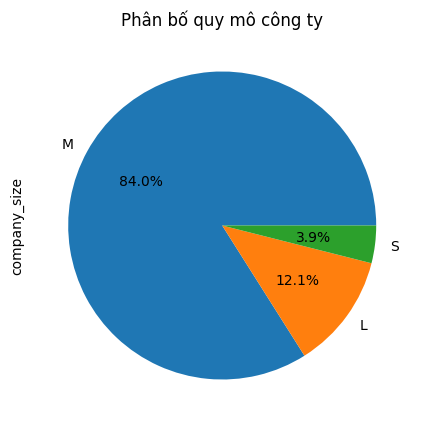

In [11]:
fig, axes = plt.subplots(1, 1, figsize=(10, 5))

ax2 = axes
df['company_size'].value_counts().plot.pie(ax=ax2, autopct='%1.1f%%')
ax2.set_title('Phân bố quy mô công ty')

plt.show()

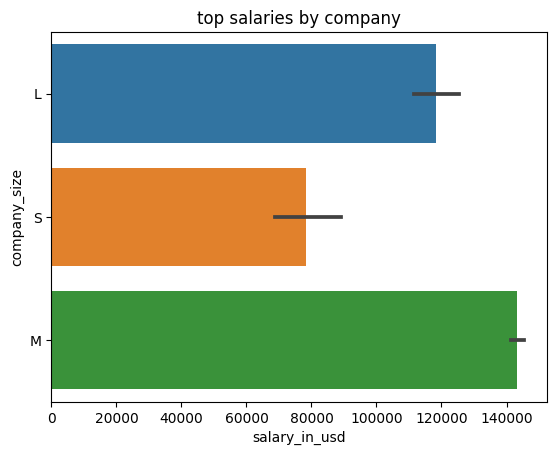

In [37]:
# Mức lương so với quy mô công ty
plt.title('top salaries by company')
plt.xlabel('company_size')
plt.ylabel('salary')
sns.barplot(y="company_size",x="salary_in_usd",data=df)
plt.show()

- quy mô công ty càng lớn, mức lương càng cao.

=> nên chọn những công ty vừa và lớn để có được mức lương cao

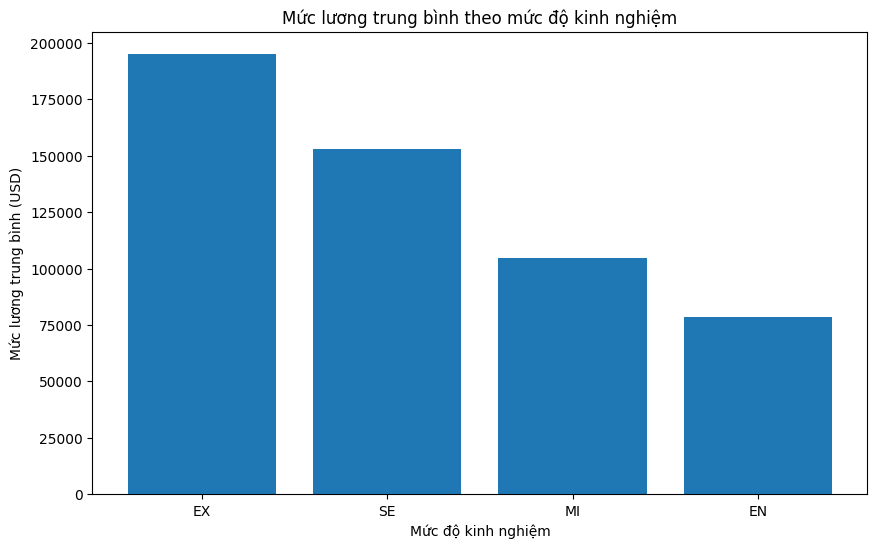

In [42]:
average_salary_by_experience = df.groupby('experience_level')['salary_in_usd'].mean()

sorted_average_salary = average_salary_by_experience.sort_values(ascending=False)

plt.figure(figsize=(10,6))
plt.bar(sorted_average_salary.index, sorted_average_salary)

plt.xlabel('Mức độ kinh nghiệm')
plt.ylabel('Mức lương trung bình (USD)')

plt.title('Mức lương trung bình theo mức độ kinh nghiệm')

plt.show()

- kinh nghiệm càng nhiều thì mức lương càng cao.

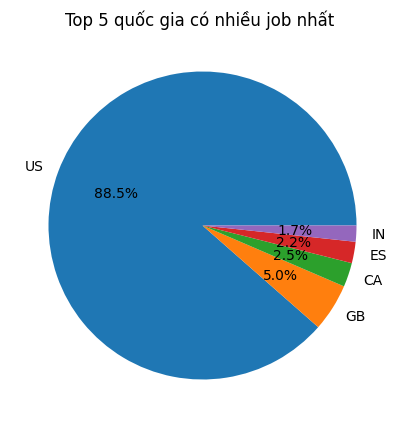

In [15]:
plt.figure(figsize=(10,5))
plt.title('Top 5 quốc gia có nhiều job nhất ')
plt.pie(list(df["company_location"].value_counts()[0:5]),labels=list(df["company_location"].value_counts().keys()[0:5]),autopct='%1.1f%%')
plt.show()

- US là quốc gia có nhiều job nhất chiếm 88.5% vì:

=> đây là một đất nước kinhh tế công nghệ phát triển có nhiều công ty công nghệ lớn như Google, Facebook, Amazon...

=> quốc gia có dân số lớn nên tạo ra 1 lượng dữ liệu lớn từ nhiều nguồn khác nhau : hệ thống giao thông, bệnh viện, mxh...

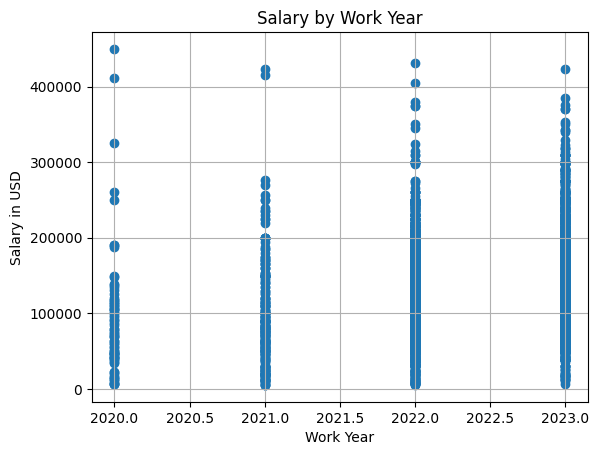

In [26]:
plt.scatter(df['work_year'], df['salary_in_usd'])
plt.xlabel('Work Year')
plt.ylabel('Salary in USD')
plt.title('Salary by Work Year')
plt.grid()
plt.show()

- mức lương 2023 đã tăng so với 2020

=> tiềm năng tăng trưởng và có nhiều cơ hội việc làm cao hơn trong lĩnh vực khoa học dữ liệu

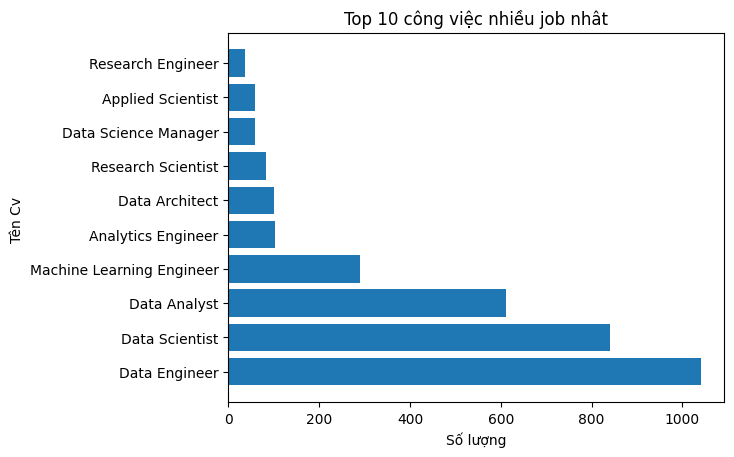

In [28]:
# 10 công việc có nhiều job nhất
plt.barh(list(df["job_title"].value_counts().keys()[0:10]),list(df["job_title"].value_counts()[0:10]))
plt.xlabel("Số lượng")
plt.ylabel("Tên Cv ")
plt.title("Top 10 công việc nhiều job nhât")
plt.show()

- Data Engineer là ngành có số lượng công việc nhiều nhất
- Mức độ phân bố không đều: số lượng job của các công việc liên quan đến Khoa học dữ liệu nhiều

=> nên chọn những job liên quan đến Data Analyst, Data Scientist, Data Engineer để có cơ hội việc làm cao.


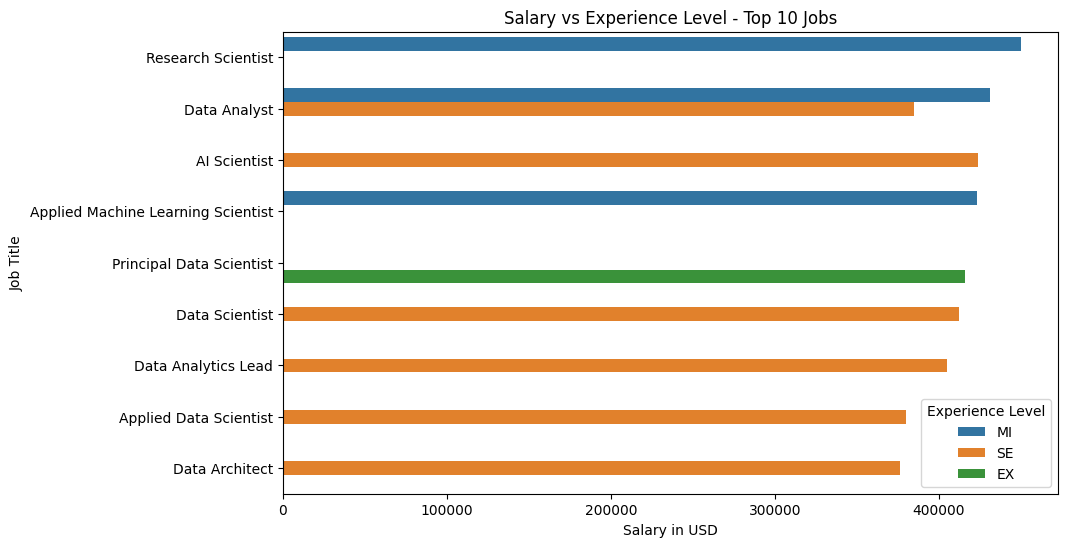

In [27]:
# Lấy danh sách top 10 công việc có mức lương cao nhất
top_10_jobs = df.nlargest(10, 'salary_in_usd')

plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_jobs, y='job_title', x='salary_in_usd', hue='experience_level')
plt.xlabel('Salary in USD')
plt.ylabel('Job Title')
plt.title('Salary vs Experience Level - Top 10 Jobs')

plt.legend(title='Experience Level')
plt.show()

- hầu hết trong top 10 công việc có mức lương cao nhất mức độ kinh nghiệm đều ở mức Cấp cao / Chuyên gia (SE)
- mức độ Trung cấp (MI) có mức lương cao nhất

In [48]:
max_salaries_by_location = df.groupby('company_location')['salary_in_usd'].max()

sorted_salaries = max_salaries_by_location.sort_values(ascending=False)

top_5_locations = sorted_salaries.head(5)
print(top_5_locations)

company_location
US    450000
GB    430967
IL    423834
IN    300000
DE    275000
Name: salary_in_usd, dtype: int64


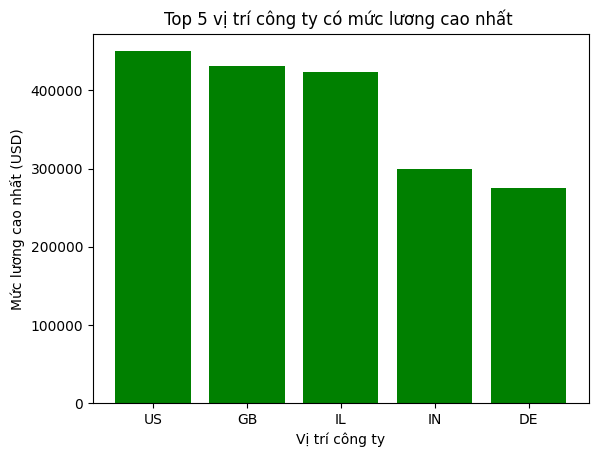

In [49]:
locations = top_5_locations.index
salaries = top_5_locations.values

plt.bar(locations, salaries, color='green')
plt.title('Top 5 vị trí công ty có mức lương cao nhất ')
plt.xlabel('Vị trí công ty')
plt.ylabel('Mức lương cao nhất (USD)')

plt.show()

- Mỹ (US) là địa điểm hàng đầu có mức lương cao nhất trong lĩnh vực khoa học dữ liệu (cao hơn 400000).
-  Anh (GB) cũng mang đến cơ hội nhận lương hấp dẫn cho các chuyên gia khoa học dữ liệu (cao hơn 400000).
- Israel (IL) cung cấp các vị trí khoa học dữ liệu được trả lương cao, đặc biệt là trong các lĩnh vực như an ninh mạng, AI và học máy (cao hơn 400000).
- Ấn Độ (IN) là một địa điểm có mức lương cạnh tranh trong lĩnh vực khoa học dữ liệu (khoảng 30000)
- Đức (DE) đưa ra mức lương hấp dẫn cho các chuyên gia khoa học dữ liệu, đặc biệt là ở các thành phố như Berlin và Munich.

In [19]:
top_countries_data = df[df['company_location'].isin(top_countries['company_location'])]
job_counts = top_countries_data.groupby(['company_location', 'job_title']).size().reset_index(name='job_count')

# Công việc được tuyển dụng nhiều nhất tại mỗi quốc gia
most_common_jobs = job_counts.groupby('company_location').apply(lambda x: x.nlargest(1, 'job_count')).reset_index(drop=True)
print(most_common_jobs)

  company_location             job_title  job_count
0               CA        Data Scientist         21
1               IL          AI Scientist          1
2               PR         Data Engineer          2
3               RU  Data Science Manager          1
4               US         Data Engineer        907


Nên chọn job Data Engineer. Vì nó nhiều đơn tuyển dụng nhất. Ngoài ra chọn công ty size L và cty có địa chỉ ở US để làm việc vì ở US có nhiều job nhất và lương cũng nằm trong top 5 các quố gia trả lương cao nhất .